#     **Text Mining**
##     **NOVA IMS**
####     **Group 013:** Carlota Reis - 20211208 | Guilherme Miranda - 20210420  

## **Stock Market Prediction**
## Predicting stock market movement from news text
### This notebook uses the dateset *train.csv* and *text.csv*

## **Dataset description**

- **ID**: unique identifier of each line/day
- **Closing Status**: dependent variable. takes the value “1” when the index closing value rose or stayed the same; and “0” when the closing value decreased
- **Headline**: news headlines ranging from "Headline1" to "Headline25". For each line, you should use these columns’ text (you are not required to use all columns) to predict the “Closing Status

## **Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
from tqdm import tqdm
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from keras.models import Model, Input
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Masking
from tensorflow.keras import layers
import gensim.downloader
#!pip install tensorflow
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
from keras.preprocessing.sequence import pad_sequences
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stopwords.words('english')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lotar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lotar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lotar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lotar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data Import

In [2]:
#Importing datasets
stocks_df_train = pd.read_csv('train.csv')
stocks_df_test = pd.read_csv('test.csv')

# **1. Data Exploration**

In [3]:
#Transforming the datasets into dataframes
stocks_df_train = pd.DataFrame(data=stocks_df_train)
stocks_df_test = pd.DataFrame(data=stocks_df_test)

#Droping ID from Train and Test sets
stocks_df_train.drop("Id", axis=1, inplace=True)
stocks_df_test.drop("Id", axis=1, inplace=True)

In [4]:
stocks_df_train

,Closing Status,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
0,1,Milan court convicts Berlusconi of tax evasion...,Suicide bomber kills 20 in Afghan mosque,"After the biggest double dip since WW2, the UK...",Billions in Hidden Riches for Family of Chines...,Former Italian Prime Minister Silvio Berluscon...,"Through Her Sister's Eyes -- ""This seemingly m...",UN to investigate civilian deaths from US dron...,Ben Goldacre: Closed drug trials leave patient...,The U.K. thinks a strike on Iran would be ille...,...,Britain rejects US request to use UK bases in ...,New York Times blocked in China over Wen Jiaba...,What Are the Odds That Israel Just Attacked Su...,Opinion poll shows 43% of French people see Is...,New York Times blocked by China after report o...,The British government opposed the establishme...,"Ashok Khemka, a bureaucrat in India, has been ...",Malala's parents overjoyed after first visit i...,"A victory for self-defence, but only a partial...",British ExxonMobil oil chief 'assassinated' in...
1,0,Iraq Police Training: $200 Million Wasted On P...,Pussy Riot: will Vladimir Putin regret taking ...,Syrian troops vow to 'purge' Aleppo of rebels ...,Four Iranians Sentenced to Death Over $2.3 Bln...,"Christchurch, New Zealand rebuild plans unveil...",Deadly Ebola Virus Reaches Ugandan Capital,Cat electrocuted; East Delhi goes powerless fo...,"In Israel, at least 7 people have set themselv...",Pussy Riot: Our arrest signals start of repres...,...,Britain just signed a 25 year contract to let ...,"Air pollution turns Beijing into ""Greyjing""",Israeli troops kill Palestinian at checkpoint,Couple stoned to death in Mali for having sex ...,Two Journalists Freed by Syrian Rebels After W...,"Across Latin America, leaders appalled by the ...",Germany Breaks 25% Renewable Energy Barrier -...,Uruguay Considers Legalizing Marijuana to Stop...,"Beijing's Real Olympic Hero: Meet Ji Sizun, im...","Philippines birth control: Filipinos want it, ..."
2,0,"Al Shabaab kidnaps, interrogates new Somali mi...",The 'For Neville' email: two words that could ...,Explosion rocks Norwegian PM's office,"Speaker of The House says UK ""parliament has r...","James Murdoch knew of phone hacking, former Ne...",Shooting at Norwegian Social Democratic Youth ...,UN report claims North Korea and Iran are exch...,Greece defaults... selectively.,"James Murdoch lied to parliament, according to...",...,East Africa's famine: Millions of human beings...,Egypt's military rulers ban foreign election o...,Large explosion in Oslo at Prime ministers off...,"A whole block just exploded in Oslo, Norway. ...",James Murdoch Accused of Lying to Parliament,Eleven killed during mass protests in Syria\n\n,Huge explosion in downtown Oslo,Indian Government Blocks Leading File-Sharing ...,"The Bin Laden Vaccine: Yes, vaccinations are a...","Posted last week, but buried beneath the bigge..."
3,1,Sweden With Entitlements &amp; Health Care Sur...,Military and medical experts call on doctors t...,Syria's only casino has been shut down and a b...,"Japan is ""very sorry"" about irradiating the oc...",First mention in a Chinese newspaper of the de...,"In post-Mubarak Egypt, abductions of women hav...","Gadhafi, in letter, asks Obama to end air stri...","Tokyo Electric Power Company ""called the initi...","Video of police assault on Ian Tomlinson, who ...",...,The cop who pushed Ian Tomlinson to the ground...,NHK: Radioactivity at Fukushima Daiichi No. 1-...,Ai Weiwei's detention suggests the bad old day...,75 Year old Georgian Woman shuts down Armenian...,English surgeons protest long wait times for m...,"""Academic researchers worldwide, including vet...","Julian Assange: ""WikiLeaks is the intelligence...",Sudan accuses Israel over Port Sudan air strik...,New Israeli-Palestinian peace proposal present...,International Energy Age

In [5]:
stocks_df_test.head()

,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,Headline10,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
0,China cyber probes show electronic warfare foc...,More pupils than expected in 'illegal schools'...,"Police sealed off a hotel in Ankara on Sunday,...","Car fires turning into a Dutch plague, 100s to...",Magnitude 5.6 / Shindo 5 earthquake shakes Iba...,Police in Colombia seize more than 8 tons of c...,Google (GOOGL.O) faces a record antitrust fine...,China waging war against ancient superstitions...,Erdoan pictured as Hitler on Turkish Embassy i...,India successfully test-fires indigenously dev...,...,An online al Qaeda magazine is calling for jih...,North Korea releases Russian yacht - detention...,Duterte vows to kill criminals and reintroduce...,"Venezuelan President decrees emergency, seizes...",Luxembourg prosecutors seek jail time for whis...,"Al Qaeda Turns to Syria, With a Plan to Challe...",Iran is arresting models who pose without head...,Scientists Seek To Bring Dead Brains Back To Life,Former CIA agent admits involvment in Nelson M...,New move to impeach Tony Blair over Iraq War g...
1,"b'Mosab Hassan Yousef, son of Hamas leader, be...","b""Gold Farming Comparable In $$ To India's Ent...","b""UK child protection database 'will be used t...",b'The Puppet Masters Behind Georgia President ...,b'2008 Globally the Coldest Year of the Centur...,"b""Iceland's Armed Forces Unveils Mecha-Bjrk [P...","b'Victims Of ""Nigerian Scams"" Giving Nigeria A...",b'Refugee camp in Darfur under direct attack',b'Israel claims allowing an aid ship to reach ...,b' Israel releases 198 Palestinian prisoners',...,"b""Flashback: Naked, drunk, surrounded by sex t...",b'Let\'s rewrite history : A new historical c...,"b""SHOCK! Amsterdam's Smoking Ban Doesn't Apply...",b'Pedophile attempts to assault and kidnap chi...,"b'Swiss engineers, a nuclear black market and ...",b'Russia accused of violating ceasefire deal',"b""N Korea's Kim died in 2003; replaced by look...",b'Four killed in Kashmir protests',b'Iraqi Teenage Girl Wearing Explosives Turns ...,"b'Wealthy Mexicans, terrified of soaring kidna..."
2,U.S. warships accompany British commercial ves...,UN calls for suspension of TTIP talks over fea...,Netanyahu: Israel will fight racism - Ethiopia...,Boko Haram stoned captive girls to death as re...,Sexting could see teenagers branded as sex off...,The lower house of Frances Parliament overwhel...,Jewish students to protest violence by speakin...,UN: More than 200 young women rescued from Bok...,Canada's Trudeau vows to cut middle-class taxe...,China is using Shanghai as a testing ground fo...,...,Prime Minister of Singapore shares his C++ cod...,South African universities join academic boyco...,The world needs to triple its investments in c...,TransCanada Keystone 1 Pipeline Suffered Major...,"Fertilizer, Also Suited for Bombs, Flows to IS...",Jihadists destroy proposed world heritage site...,Qatar detained German reporters investigating ...,China overtakes Mexico as top sender of immigr...,Philippines' Most Wanted Terrorist Killed by B...,Canada poised to pass anti-terror legislation ...
3,"400,000-year-old fossils from Spain provide ea...",Blood Lions documentary exposes controversial ...,Saudi Arabia 'planning Nato-like military alli...,Pakistan cricket captain Shahid Afridi accused...,Saudi Arabia-led coalition kills 41 civilians ...,"NSW, Australia: Anti-coal seam gas protesters ...",Belgian police hunt gunman after Brussels anti...,NASA will intentionally start a fire on a carg...,North Korea Sentences US Tourist to 15 Years i...,"Chinese website publishes, then pulls, explosi...",...,"Denmark world's happiest country, Burundi leas...",Rescuers: Female suicide bombers kill 22 at Ni...,A powerful Syrian Kurdish political party is p...,The world's first solar airport no longer pays...,More than 40 civilians killed in Yemen mar

In [6]:
stocks_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Closing Status  1690 non-null   int64 
 1   Headline1       1690 non-null   object
 2   Headline2       1690 non-null   object
 3   Headline3       1687 non-null   object
 4   Headline4       1690 non-null   object
 5   Headline5       1690 non-null   object
 6   Headline6       1690 non-null   object
 7   Headline7       1690 non-null   object
 8   Headline8       1690 non-null   object
 9   Headline9       1690 non-null   object
 10  Headline10      1690 non-null   object
 11  Headline11      1687 non-null   object
 12  Headline12      1690 non-null   object
 13  Headline13      1690 non-null   object
 14  Headline14      1690 non-null   object
 15  Headline15      1690 non-null   object
 16  Headline16      1690 non-null   object
 17  Headline17      1690 non-null   object
 18  Headline

In [7]:
stocks_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Headline1   299 non-null    object
 1   Headline2   299 non-null    object
 2   Headline3   299 non-null    object
 3   Headline4   299 non-null    object
 4   Headline5   299 non-null    object
 5   Headline6   299 non-null    object
 6   Headline7   299 non-null    object
 7   Headline8   299 non-null    object
 8   Headline9   299 non-null    object
 9   Headline10  299 non-null    object
 10  Headline11  299 non-null    object
 11  Headline12  299 non-null    object
 12  Headline13  299 non-null    object
 13  Headline14  299 non-null    object
 14  Headline15  299 non-null    object
 15  Headline16  299 non-null    object
 16  Headline17  299 non-null    object
 17  Headline18  299 non-null    object
 18  Headline19  299 non-null    object
 19  Headline20  299 non-null    object
 20  Headline21

In [8]:
#Checking the presence of missing values in the Training Dataset
print(stocks_df_train.isnull().sum())

#Headline 3, 11 and 23 present missing values

Closing Status    0
Headline1         0
Headline2         0
Headline3         3
Headline4         0
Headline5         0
Headline6         0
Headline7         0
Headline8         0
Headline9         0
Headline10        0
Headline11        3
Headline12        0
Headline13        0
Headline14        0
Headline15        0
Headline16        0
Headline17        0
Headline18        0
Headline19        0
Headline20        0
Headline21        0
Headline22        0
Headline23        1
Headline24        0
Headline25        0
dtype: int64


In [9]:
#Checking the presence of missing values in the Test Dataset
print(stocks_df_test.isnull().sum())

Headline1     0
Headline2     0
Headline3     0
Headline4     0
Headline5     0
Headline6     0
Headline7     0
Headline8     0
Headline9     0
Headline10    0
Headline11    0
Headline12    0
Headline13    0
Headline14    0
Headline15    0
Headline16    0
Headline17    0
Headline18    0
Headline19    0
Headline20    0
Headline21    0
Headline22    0
Headline23    0
Headline24    0
Headline25    0
dtype: int64


In [10]:
#Checking how many Closing Status we have
stocks_df_train['Closing Status'].value_counts()

1    902
0    788
Name: Closing Status, dtype: int64

In [11]:
#Checking how many Closing Status we have in %
stocks_df_train['Closing Status'].value_counts(normalize='True') 

1    0.533728
0    0.466272
Name: Closing Status, dtype: float64

array([[<AxesSubplot:title={'center':'Closing Status'}>]], dtype=object)

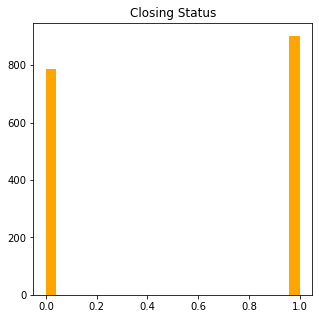

In [12]:
#Visualizing
stocks_df_train.hist(column='Closing Status', bins=25, grid=False, figsize=(5,5), color='orange', rwidth=5)


<AxesSubplot:>

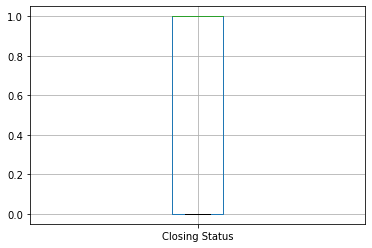

In [13]:
stocks_df_train.boxplot(['Closing Status'])

In [14]:
#Summary Statisticks
stocks_df_train['Closing Status'].describe()

count    1690.000000
mean        0.533728
std         0.499009
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Closing Status, dtype: float64

### *Checking some statistics about the words that appear in the News Headlines*

In [15]:
#Creating New Dataframe
stocks_df_train2 = stocks_df_train

#Appending all the Headlines into 1 columns
stocks_df_train3 = []
for row in range(0,1690):
    stocks_df_train3.append(' '.join(str(x) for x in stocks_df_train2.iloc[row,1:25]))

#Adding this column to dataframe
stocks_df_train2['Sum'] = stocks_df_train3

#Creating word count column and stripping it
stocks_df_train2['word_count']  = stocks_df_train2['Sum'].apply(lambda x: len(str(x).split(" ")))
stocks_df_train2[['Sum','word_count']].head()

,Sum,word_count
0,Milan court convicts Berlusconi of tax evasion...,590
1,Iraq Police Training: $200 Million Wasted On P...,468
2,"Al Shabaab kidnaps, interrogates new Somali mi...",295
3,Sweden With Entitlements &amp; Health Care Sur...,534
4,FIFA has banned Croatian defender Josip Simuni...,523


In [16]:
stocks_df_train2.word_count.describe()

count    1690.000000
mean      426.224260
std        70.295393
min       215.000000
25%       380.000000
50%       427.000000
75%       472.000000
max       660.000000
Name: word_count, dtype: float64

<AxesSubplot:>

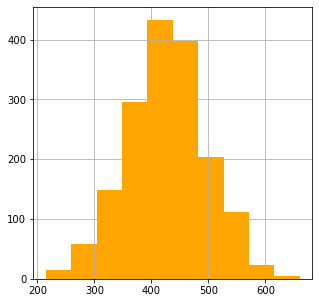

In [17]:
stocks_df_train2['word_count'].hist(figsize=(5,5), color='orange', rwidth=5, bins=10)

In [18]:
all_words = ' '.join(stocks_df_train2['Sum']).split()  #join all words into a single variable

all_words[0:20] #example of the first 20 words

['Milan',
 'court',
 'convicts',
 'Berlusconi',
 'of',
 'tax',
 'evasion,',
 'gives',
 '4-year',
 'sentence',
 'Suicide',
 'bomber',
 'kills',
 '20',
 'in',
 'Afghan',
 'mosque',
 'After',
 'the',
 'biggest']

In [19]:
len(all_words)

716584

In [20]:
freq = pd.Series(all_words).value_counts() #transform list of words into pandas series to count the freq of each word
freq[0:15]

the     21949
to      20949
of      18364
in      17716
a       11411
and     10036
for      7357
on       6144
is       4968
-        4071
by       4057
that     3870
has      3680
with     3441
from     3410
dtype: int64

In [21]:
# Majority of the words are stopwords

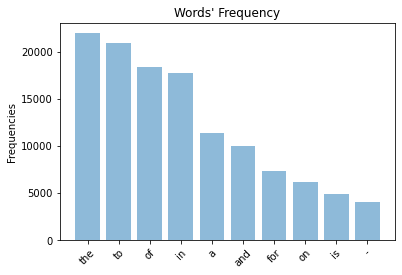

In [22]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.ylabel('Frequencies')
plt.title('Words\' Frequency')
plt.xticks(rotation=45)
plt.show()

# **2. Corpus Split (train and test sets)**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(stocks_df_train2['Sum'], stocks_df_train2['Closing Status'], test_size=0.25, random_state=4)

In [24]:
X_train.head()

138    Students storm the Executive Yuan (executive b...
354    b'McKinney released, returning to United State...
877    b'Could we finally see a thawing of relations ...
420    b'7 children, 2 adults hacked to death with ki...
930    THE US consulate in Melbourne has warned citiz...
Name: Sum, dtype: object

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1267, 423, 1267, 423)

# **3. Data Preprocessing**

### *Preprocessing Methods*

In [26]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [27]:
def pre_clean(text_list):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE IDENTIFIED ISSUES IN THE CORPUS
        text = re.sub("b\"", "", text)
        text = re.sub("b'", "", text)
        text = re.sub("u.s.","us", text)
        text = re.sub("u.s","us", text)
        text = re.sub("us.","us", text)
        text = re.sub("u.k.","uk", text)
        text = re.sub("u.k","uk", text)
        text = re.sub("uk.","uk", text)
        text = re.sub("u.n.","un", text)
        text = re.sub("u.n","un", text)
        text = re.sub("un.","un", text)
        


        updates.append(text)
        
    return updates

In [28]:
X_train_pre_clean = pre_clean(X_train)


100%|██████████| 1267/1267 [00:00<00:00, 28788.65it/s]


In [29]:
X_test_pre_clean = pre_clean(X_test)

100%|██████████| 423/423 [00:00<00:00, 28195.77it/s]


In [30]:
def clean(text_list):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
      
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )

        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
                
        #Lemmatize
        text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #Stemming
        text = " ".join(stemmer.stem(word) for word in text.split())
            
        updates.append(text)
        
    return updates

In [31]:
X_train_clean = clean(X_train_pre_clean)

100%|██████████| 1267/1267 [00:04<00:00, 257.37it/s]


In [32]:
X_test_clean = clean(X_test_pre_clean)

100%|██████████| 423/423 [00:01<00:00, 331.00it/s]


In [33]:
X_train_clean[7] #example

'greek pull fun bank emerg cabinet name iran hang israel spi nuclear scientist kill thoun flee congo battl renegad general reuter lead italian unvers switch teach english languag burma vow ceas buy weapon north korea greek withdraw million day begin runon bank bosnian command mladic led ethnic cleans war crime trial told face coun war crime amp crime human includ genocid connect brutal bosnian war call accust monstrous amp enter guilti plea exclusv china pus north korea drop nuclear test plan sourc year old schoolgirl die doctor mistook tuberculosi lovesick telegraph major mexican want ushelp drug war want usmilitari interven mexican soil victoria grant hit lectur circuit explain canadian bank fraud g report detail mass violat right polic say excess forc usd toronto search remain teenag girl miss decad italian polic open vatican own tomb mobster enrico de pedi box bone foun inter corps deepen mysteri chines offici usor america ausralia cannot juggl relationship unt state china indefini

In [34]:
X_train_clean[11] #example

'iceland econom polit futur hang balanc head toward referendum compens britain netherland money lost collaps iceland bank bishop ask parishion cash help pay abus claim first ausralia like video game like real game far go go uscongression panel describ kill armenian tukh forc world war genocid despit white hous object uspanel armenia kill genocid earthquk hit taiwan time shade watt itali hit new outbreak race riot egyptian man stab death milan backlash simon singh libel case pushiropractor rope one four chiropractor britain uner investig result campaign singh support wow amaz pic color india six year ago claim ususd white phosphorousand deplet uranium fallujah today disturb larg number case birth defect mexico citi see gay marriag law dutch anti islam leader geert wilder major winner local elect refus electron strip search airport without detain saudi woman file harass claim saudi arabia without accompani male relat sentenc lash month jail disturb stori falluja birth defect divorc puber

### *Checking new statistics about the words, after the "cleaning"*

In [35]:
#Creating new X_train to check word statistics of the "cleaned" comments 
X_train_clean2 = pd.DataFrame(X_train_clean)

#Substitute axis name to Headline1
X_train_clean2 = X_train_clean2.set_axis(['Sum'], axis=1, inplace=False)

#Create Word Count column with the word counts of each day
X_train_clean2['word_count']  = X_train_clean2['Sum'].apply(lambda x: len(str(x).split(" ")))
X_train_clean2[['Sum','word_count']].head()

,Sum,word_count
0,student storm execut yunexecut branch gvmt esc...,233
1,mckinney releas retun unt state programm steal...,199
2,could final see thaw relat north korea ukto sh...,265
3,child adult hack death kitchen cleaver china k...,266
4,usconsul melbounha warn citizen terrorist atta...,330


In [36]:
X_train_clean2.word_count.describe()


count    1267.000000
mean      275.665351
std        43.310008
min       152.000000
25%       248.000000
50%       278.000000
75%       303.500000
max       419.000000
Name: word_count, dtype: float64

<AxesSubplot:>

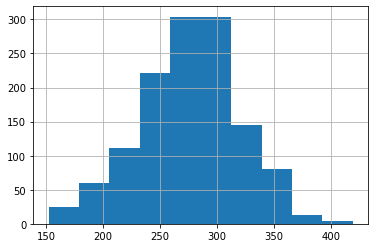

In [37]:
X_train_clean2['word_count'].hist()


In [38]:
all_words = ' '.join(X_train_clean2['Sum']).split()  #join all words into a single variable

In [39]:
len(all_words)

349268

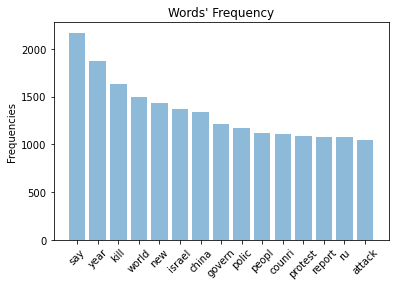

In [40]:
freq = pd.Series(all_words).value_counts() #transform list of words into pandas series to count the freq of each word

x_labels = freq.index[0:15]
values = freq[:15]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.ylabel('Frequencies')
plt.title('Words\' Frequency')
plt.xticks(rotation=45)
plt.show()

# **4. Feature Engineering**

### *BoW*

In [41]:
bow = CountVectorizer(binary=True)

#Defining independent variables
X1 = bow.fit_transform(X_train_clean)

print(X1[10:13].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
print(bow.get_feature_names()[20000:20022])

['untextbook', 'unth', 'unthat', 'untheir', 'unthem', 'unther', 'unthic', 'unthreat', 'unthreaten', 'unti', 'untini', 'untisa', 'unto', 'untold', 'untoo', 'untortur', 'untradit', 'untreati', 'untribunl', 'untroop', 'untrunid', 'unublish']


C:\Users\lotar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
#Defining dependent variable
y = np.array(y_train)
len(y)

1267

### *TF-IDF*

In [44]:
tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))  #If a word appears at least 80% in docs removes and sequences of 2 words

In [45]:
#Defining independent variables
X2 = tfidf.fit_transform(X_train_clean) #Fit and transform vectorizer to clean text. Create BoW space. Each line is a document

In [46]:
#TF-IDF score

df = pd.DataFrame(X2[0].T.todense(), index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

                  TF-IDF
ruksar          0.120399
annex           0.084900
polio           0.077761
crimea          0.072408
mh              0.072408
ru              0.069486
escal           0.067150
trap relat      0.060200
rd militari     0.060200
pm next         0.060200
founer peter    0.060200
taiwan ebola    0.060200
take rd         0.060200
dozen spread    0.060200
india beat      0.060200
date taiwan     0.060200
halt arm        0.060200
recov object    0.060200
armi rio        0.060200
runhoney trap   0.060200
announ support  0.060200
share bedroom   0.060200
spread capit    0.060200
counri ever     0.060200
sweden mi       0.060200


# **5. Classification Models**

## **KNN** - BoW

##### *Train Set*

In [47]:
#Train Classifier
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

#Fitting the model
modelknn.fit(X1,y)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

##### *Test Set*

In [48]:
#Defining the independent and dependent variables
X_test1 = bow.transform(X_test_clean)
y_test1 = np.array(y_test)

#Predicting for test set
y_pred1 = modelknn.predict(X_test1)


### Evaluation

In [49]:
confusion_matrix(y_pred1, y_test1)

array([[ 64,  80],
       [128, 151]], dtype=int64)

In [50]:
labels = {"Index Increase/Mantain":1, "Index Decrease":0}
print(classification_report(y_pred1, y_test1, target_names = labels.keys()))

                        precision    recall  f1-score   support

Index Increase/Mantain       0.33      0.44      0.38       144
        Index Decrease       0.65      0.54      0.59       279

              accuracy                           0.51       423
             macro avg       0.49      0.49      0.49       423
          weighted avg       0.54      0.51      0.52       423



C:\Users\lotar\AppData\Local\Temp/ipykernel_3484/4034274701.py:39: UserWarning: Attempting to set identical bottom == top == 1.5 results in singular transformations; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


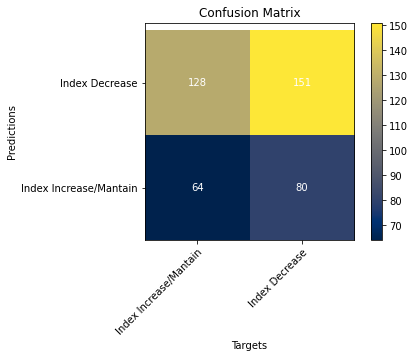

In [51]:
def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred1, y_test1), labels.keys())

## **KNN** - TF-IDF

##### *Train Set*

In [52]:
#Train Classifier
modelknn2 = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

#Fitting the Model
modelknn2.fit(X2,y)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

##### *Test Set*

In [53]:
X_test2 = tfidf.transform(X_test_clean).toarray()

y_test2 = y_test.to_numpy()
y_pred2 = modelknn2.predict(X_test2)


### Evaluation

In [54]:
confusion_matrix(y_pred2, y_test2)


array([[ 83, 100],
       [109, 131]], dtype=int64)

In [55]:
labels = {"Index Increase/Mantain":1, "Index Decrease":0}
print(classification_report(y_pred2, y_test2, target_names = labels.keys()))

                        precision    recall  f1-score   support

Index Increase/Mantain       0.43      0.45      0.44       183
        Index Decrease       0.57      0.55      0.56       240

              accuracy                           0.51       423
             macro avg       0.50      0.50      0.50       423
          weighted avg       0.51      0.51      0.51       423



## **Naive Bayes** - TF-IDF

##### *Train Set*

In [56]:
X3 = X2.toarray()

nb = GaussianNB()
nb.fit(X3, y)

GaussianNB()

##### *Test Set*

In [57]:
nb_pred = nb.predict(X_test2)


print(classification_report(y_test2, nb_pred))

              precision    recall  f1-score   support

           0       0.39      0.29      0.33       192
           1       0.51      0.62      0.56       231

    accuracy                           0.47       423
   macro avg       0.45      0.45      0.45       423
weighted avg       0.46      0.47      0.46       423



## Logistic Regression - TF-IDF

##### *Train Set*

In [58]:
lr = LogisticRegression(random_state=5)

In [59]:
lr.fit(X3,y)

LogisticRegression(random_state=5)

In [60]:
lr.classes_

array([0, 1], dtype=int64)

In [61]:
lr.coef_

array([[-0.0227289 , -0.0227289 , -0.04247955, ...,  0.01894846,
         0.01863855,  0.01863855]])

In [62]:
lr.intercept_

array([0.10712322])

##### *Test Set*

In [63]:
lr_pred = lr.predict(X_test2)

In [64]:
lr.predict_proba(X_test2)

array([[0.48198806, 0.51801194],
       [0.45226455, 0.54773545],
       [0.460844  , 0.539156  ],
       [0.46693258, 0.53306742],
       [0.51503735, 0.48496265],
       [0.47444623, 0.52555377],
       [0.47486304, 0.52513696],
       [0.45772648, 0.54227352],
       [0.47478003, 0.52521997],
       [0.4619695 , 0.5380305 ],
       [0.45143592, 0.54856408],
       [0.45819245, 0.54180755],
       [0.45521104, 0.54478896],
       [0.47660295, 0.52339705],
       [0.44378002, 0.55621998],
       [0.52761056, 0.47238944],
       [0.47353693, 0.52646307],
       [0.47927039, 0.52072961],
       [0.41175308, 0.58824692],
       [0.44903162, 0.55096838],
       [0.50172713, 0.49827287],
       [0.45174139, 0.54825861],
       [0.44816034, 0.55183966],
       [0.42965369, 0.57034631],
       [0.46368287, 0.53631713],
       [0.51340033, 0.48659967],
       [0.48758033, 0.51241967],
       [0.43239614, 0.56760386],
       [0.4667485 , 0.5332515 ],
       [0.452339  , 0.547661  ],
       [0.

In [65]:
print(classification_report(y_test2, lr_pred))

              precision    recall  f1-score   support

           0       0.39      0.08      0.13       192
           1       0.54      0.90      0.68       231

    accuracy                           0.53       423
   macro avg       0.47      0.49      0.40       423
weighted avg       0.47      0.53      0.43       423



Similar to a linear regression squashed to a logistic function. Support = nº times each label appears in \
the corpus. Most of them are 1s. F1-Score: macro avg is the mean between the 2 and the weighted average has a \
a ponderation with support"

## Multilayer Perceptron - ANN - TF-IDF

##### *Train Set*

In [66]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1)

In [67]:
mlp.fit(X3,y)

C:\Users\lotar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2), random_state=1)

##### *Test Set*

In [68]:
mlp_pred = mlp.predict(X_test2)

In [69]:
print(classification_report(y_test2, mlp_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.55      1.00      0.71       231

    accuracy                           0.55       423
   macro avg       0.27      0.50      0.35       423
weighted avg       0.30      0.55      0.39       423



C:\Users\lotar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lotar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lotar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **2.1. Corpus Split (train and test sets) - reduced data**

In [83]:
#Drop Headlines due to computational memory issues
stocks_df_train_red = stocks_df_train2
stocks_df_train_red.drop(stocks_df_train_red.iloc[:,12:28], inplace = True, axis = 1)

In [92]:
#Appending all the Headlines into 1 column
stocks_df_train_red2 = []
for row in range(0,1690):
    stocks_df_train_red2.append(' '.join(str(x) for x in stocks_df_train_red.iloc[row,1:12]))

#Adding this column to dataframe
stocks_df_train_red['Sum'] = stocks_df_train_red2

#Creating word count column and stripping it
stocks_df_train_red['word_count']  = stocks_df_train_red['Sum'].apply(lambda x: len(str(x).split(" ")))
stocks_df_train_red[['Sum','word_count']].head()

,Sum,word_count
0,Milan court convicts Berlusconi of tax evasion...,244
1,Iraq Police Training: $200 Million Wasted On P...,227
2,"Al Shabaab kidnaps, interrogates new Somali mi...",131
3,Sweden With Entitlements &amp; Health Care Sur...,254
4,FIFA has banned Croatian defender Josip Simuni...,244


In [95]:
X_train, X_test, y_train, y_test = train_test_split(stocks_df_train_red['Sum'], stocks_df_train_red['Closing Status'], test_size=0.25, random_state=4)

# **3. Data Preprocessing - reduced data**

In [96]:
X_train_pre_clean = pre_clean(X_train)

X_test_pre_clean = pre_clean(X_test)

X_train_clean = clean(X_train_pre_clean)

X_test_clean = clean(X_test_pre_clean)

100%|██████████| 423/423 [00:00<00:00, 687.64it/s]


### *Checking new statistics about the words, after the "cleaning"*

In [97]:
#Creating new X_train to check word statistics of the "cleaned" comments 
X_train_clean2 = pd.DataFrame(X_train_clean)

In [98]:
X_train_clean2 = X_train_clean2.set_axis(['Sum'], axis=1, inplace=False)

In [99]:
#Create Word Count column with the word counts of each day
X_train_clean2['word_count']  = X_train_clean2['Sum'].apply(lambda x: len(str(x).split(" ")))
X_train_clean2[['Sum','word_count']].head()

,Sum,word_count
0,student storm execut yunexecut branch gvmt esc...,102
1,mckinney releas retun unt state programm steal...,91
2,could final see thaw relat north korea ukto sh...,131
3,child adult hack death kitchen cleaver china k...,101
4,usconsul melbounha warn citizen terrorist atta...,143


In [100]:
X_train_clean2.word_count.describe()

count    1267.000000
mean      123.880032
std        25.071899
min        58.000000
25%       106.000000
50%       123.000000
75%       143.000000
max       213.000000
Name: word_count, dtype: float64

In [103]:
all_words = ' '.join(X_train_clean2['Sum']).split()  #join all words into a single variable

len(all_words)

freq = pd.Series(all_words).value_counts() #transform list of words into pandas series to count the freq of each word
freq

say       1024
year       796
kill       729
world      695
new        687
          ... 
valor        1
in           1
abram        1
snund        1
abolit       1
Length: 14899, dtype: int64

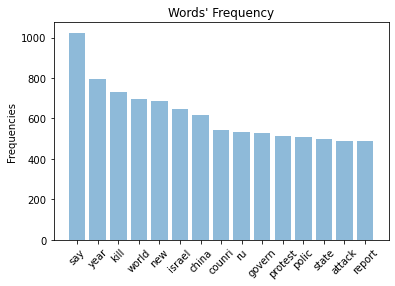

In [104]:
x_labels = freq.index[0:15]
values = freq[:15]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.ylabel('Frequencies')
plt.title('Words\' Frequency')
plt.xticks(rotation=45)
plt.show()

### *Feature Engeneering - Word Embeddings*

In [105]:
#model options
print(list(gensim.downloader.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [131]:
#The most suitable gensim package to download would be 'word2vec-google-news-300', 
#although, due to lack of computing power, the 'glove-twitter-25' was chosen, due to being lighter. 
w2v = gensim.downloader.load('glove-twitter-25')

def corpus2vec(corpus):
    corpus_vec = []
    for document in corpus:
        #get word vectors for each document
        doc_vectors = []
        for word in document.split():
            if word in w2v.index_to_key:
                doc_vectors.append(w2v.word_vec(word))         
        corpus_vec.append(doc_vectors)
    return corpus_vec

X_vec = corpus2vec(X_train_clean)

X_test_vec = corpus2vec(X_test_clean)

C:\Users\lotar\AppData\Local\Temp/ipykernel_3484/2709234932.py:10: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vectors.append(w2v.word_vec(word))


In [170]:
len(X_train_clean)

1267

### *Pad Sequences*

In [171]:
train_len = []
for i in X_vec:
    train_len.append(len(i))
max(train_len)


188

In [172]:
y_train = y_train.to_numpy()

In [173]:
y_test = y_test.to_numpy()

In [174]:
X_pad = pad_sequences(maxlen=188,sequences=X_vec, padding="post", dtype='float64')

X5 = tf.convert_to_tensor(X_pad, dtype='float32')

y5 = tf.one_hot(y_train, depth=2)

## LSTM - Pad Sequences

In [175]:
tf.random.set_seed(239)


##### *Train Set*

In [181]:
'''model input in the shape(number of words per doc, word embedding size)'''
input_ = Input(shape=(188,25))

'''mask layer to avoid model from considering padding vectors'''
mask_layer = Masking(mask_value=0)
mask = mask_layer(input_)

'''BiLSTM layer'''

lstm = Bidirectional(LSTM(units=4))(mask)

'''activation layer'''
act = Dense(2, activation='sigmoid')(lstm)

'''model input and output'''
model = Model(input_, act)

'''model loss function and evaluation metrics'''
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 188, 25)]         0         
                                                                 
 masking_4 (Masking)         (None, 188, 25)           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 8)                960       
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 978
Trainable params: 978
Non-trainable params: 0
_________________________________________________________________


In [182]:
history = model.fit(X5, y5, batch_size=16, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
64/64 [==============================] - 117s 2s/step - loss: 0.7053 - binary_accuracy: 0.4822 - val_loss: 0.7027 - val_binary_accuracy: 0.4921
Epoch 2/20
64/64 [==============================] - 122s 2s/step - loss: 0.6944 - binary_accuracy: 0.5114 - val_loss: 0.6975 - val_binary_accuracy: 0.5000
Epoch 3/20
64/64 [==============================] - 122s 2s/step - loss: 0.6915 - binary_accuracy: 0.5326 - val_loss: 0.6966 - val_binary_accuracy: 0.5138
Epoch 4/20
64/64 [==============================] - 124s 2s/step - loss: 0.6884 - binary_accuracy: 0.5410 - val_loss: 0.6952 - val_binary_accuracy: 0.5098
Epoch 5/20
64/64 [==============================] - 121s 2s/step - loss: 0.6861 - binary_accuracy: 0.5479 - val_loss: 0.6956 - val_binary_accuracy: 0.5157
Epoch 6/20
64/64 [==============================] - 121s 2s/step - loss: 0.6840 - binary_accuracy: 0.5573 - val_loss: 0.6959 - val_binary_accuracy: 0.5236
Epoch 7/20
64/64 [==============================] - 123s 2s/step - los

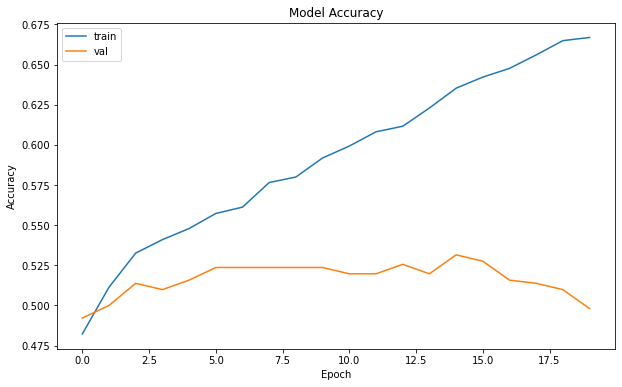

In [183]:
plt.figure(figsize =(10, 6))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### *Test Set*

In [184]:
X_test_pad = pad_sequences(maxlen=188,sequences=X_test_vec, padding="post", dtype='float64')

In [185]:
X_test5 = tf.convert_to_tensor(X_test_pad, dtype='float32')

In [186]:
pred_y5 = model.predict(X_test5)

In [187]:
y_pred5 = []
for doc in pred_y5:
    y_pred5.append(np.argmax(doc, axis=None, out=None))

In [190]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44       192
           1       0.54      0.57      0.56       231

    accuracy                           0.50       423
   macro avg       0.50      0.50      0.50       423
weighted avg       0.50      0.50      0.50       423



### *Feature Engeneering - Word Embeddings pt2*

In [192]:
def get_w2v(corpus):
    doc_vec = []
    for document in corpus:
        sentence_vector = 0
        count = 0
        for word in document.split():
            if word in w2v.index_to_key:
                count+=1
                sentence_vector = np.add(sentence_vector, w2v.word_vec(word))
        avg_vector=sentence_vector/count
        doc_vec.append(sentence_vector)
    return doc_vec

In [193]:
X_vec = get_w2v(X_train_clean)
len(X_vec)

C:\Users\lotar\AppData\Local\Temp/ipykernel_3484/1943873392.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  sentence_vector = np.add(sentence_vector, w2v.word_vec(word))


1267

In [194]:
X_test_vec = get_w2v(X_test_clean)
len(X_test_vec)

C:\Users\lotar\AppData\Local\Temp/ipykernel_3484/1943873392.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  sentence_vector = np.add(sentence_vector, w2v.word_vec(word))


423

# Logistic Regression - Word Embeddings

##### *Train Set*

In [196]:
lr = LogisticRegression(random_state=4)

In [197]:
lr.fit(X_vec,y_train)

C:\Users\lotar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4)

##### *Test Set*

In [199]:
lr_pred = lr.predict(X_test_vec)

In [200]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.45      0.37      0.41       192
           1       0.54      0.62      0.58       231

    accuracy                           0.51       423
   macro avg       0.50      0.50      0.49       423
weighted avg       0.50      0.51      0.50       423



# Multilayer Perceptron - ANN  - Word Embeddings

##### *Train Set*

In [201]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1)

In [202]:
mlp.fit(X_vec,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2), random_state=1)

##### *Test Set*

In [203]:
mlp_pred = mlp.predict(X_test_vec)

In [204]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.55      1.00      0.71       231

    accuracy                           0.55       423
   macro avg       0.27      0.50      0.35       423
weighted avg       0.30      0.55      0.39       423



C:\Users\lotar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lotar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lotar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
